In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import pandas as pd
from cycler import cycler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

import sklearn



def visualize_scatter(data_2d, label_ids, starting_cluster, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    label_ids = label_ids - starting_cluster
    
    nb_classes = len(np.unique(label_ids))
    i = 0
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.tab20b(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=np.arange(nb_classes)[i]+starting_cluster)#id_to_label_dict[label_id])
        i+=1
    plt.legend(loc='best')

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.2.


/home/leomelo/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
df = pd.read_csv("data/bags.csv",header=None)

# #Separate the DF into Train and Test
# msk = np.random.rand(len(df)) < 0.7

# test_df = df[~msk]

# df = df[msk]

# #DF is now the training set

#Separate the Training DF into Train and Validation
# msk = np.random.rand(len(df)) < 0.8

# validation_df = df[~msk]
# df = df[msk]


#print(train_df.shape)

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.metrics.cluster import davies_bouldin_score

# The kmeans algorithm is implemented in the scikits-learn library

#A = pd.read_csv("A.csv")
 
 
distortions = []
cost_old = 100
cost = 100
epsilon = 0.00001
error_label = []
silhouette_avgs = []
davies_bouldin_avgs = []

starting_k = 15
final_k = 250
step = 1

for k in range (starting_k, final_k,step):
    
    print("Calculating metrics for k = ", k)
    
    if (abs(cost > cost_old)):
        break
    
    cost_old = cost
    
    
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(df.iloc[:, :])
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    
    #Calculate Silhouette score
    print("Calculating Silhouette score...")
    silhouette_avg = silhouette_score(df, labels)
    silhouette_avgs.append(silhouette_avg)
    
    #Calculate Davies_boulding score
    #print("Calculating Davies Boulding score...")
    #davies_bouldin_avg = davies_bouldin_score(df, labels)
    #davies_bouldin_avgs.append(davies_bouldin_avg)
    
    # Sum of distances of samples to their closest cluster center
    inertia = kmeans_model.inertia_
    cost = inertia/df.shape[0]
    
    distortions.append(cost)
    error_label.append(k)
    #print("k:",k, " cost:", cost)

Calculating metrics for k =  15
Calculating Silhouette score...
Calculating metrics for k =  16
Calculating Silhouette score...
Calculating metrics for k =  17
Calculating Silhouette score...
Calculating metrics for k =  18
Calculating Silhouette score...
Calculating metrics for k =  19
Calculating Silhouette score...
Calculating metrics for k =  20
Calculating Silhouette score...
Calculating metrics for k =  21
Calculating Silhouette score...
Calculating metrics for k =  22
Calculating Silhouette score...
Calculating metrics for k =  23
Calculating Silhouette score...
Calculating metrics for k =  24
Calculating Silhouette score...
Calculating metrics for k =  25
Calculating Silhouette score...
Calculating metrics for k =  26
Calculating Silhouette score...
Calculating metrics for k =  27
Calculating Silhouette score...
Calculating metrics for k =  28
Calculating Silhouette score...
Calculating metrics for k =  29
Calculating Silhouette score...
Calculating metrics for k =  30
Calculat

0.9003517086605001
34


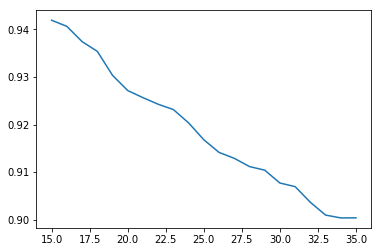

In [122]:
plt.plot(error_label, distortions)
min_error = np.array(distortions).min()
print(min_error)
k_min_error = np.nonzero(np.array(distortions) == min_error)[0][0]+starting_k
print(k_min_error)

0.032012508443665065
34


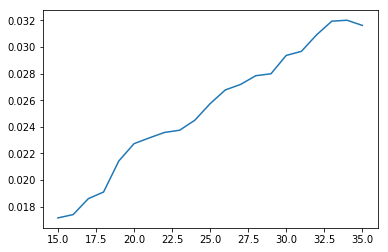

In [123]:
plt.plot(error_label, silhouette_avgs)
max_coef = np.array(silhouette_avgs).max()
print(max_coef)
k_max_coef = np.nonzero(np.array(silhouette_avgs) == max_coef)[0][0]+starting_k
print(k_max_coef)

In [124]:
df_text = pd.read_csv("data/health.txt", sep="|")
df_text = np.array(df_text["headline_text"])
print(df_text[df_text.shape[0]-1])

C. diff 'manslaughter' inquiry call


In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

k = int(k_min_error)

print("Clusters with k = ", k)

# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(df.iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = kmeans_model.labels_

print(df.index)
for j in range (k):
    k_x = df.index[labels==j]
    file_k = open("output/clusters/k_"+str(j)+".txt", 'w+')
    for i in range(df_text.shape[0]):
        if i in k_x:
            file_k.write(df_text[i]+"\n")
    file_k.close()
print(df.shape)

Clusters with k =  34
RangeIndex(start=0, stop=13229, step=1)
(13229, 1203)


output/clusters/k_0.txt
output/clusters/k_1.txt
output/clusters/k_2.txt
output/clusters/k_3.txt
output/clusters/k_4.txt
output/clusters/k_5.txt
output/clusters/k_6.txt
output/clusters/k_7.txt
output/clusters/k_8.txt
output/clusters/k_9.txt
output/clusters/k_10.txt
output/clusters/k_11.txt
output/clusters/k_12.txt
output/clusters/k_13.txt
output/clusters/k_14.txt
output/clusters/k_15.txt
output/clusters/k_16.txt
output/clusters/k_17.txt
output/clusters/k_18.txt
output/clusters/k_19.txt
output/clusters/k_20.txt
output/clusters/k_21.txt
output/clusters/k_22.txt
output/clusters/k_23.txt
output/clusters/k_24.txt
output/clusters/k_25.txt
output/clusters/k_26.txt
output/clusters/k_27.txt
output/clusters/k_28.txt
output/clusters/k_29.txt
output/clusters/k_30.txt
output/clusters/k_31.txt
output/clusters/k_32.txt
output/clusters/k_33.txt


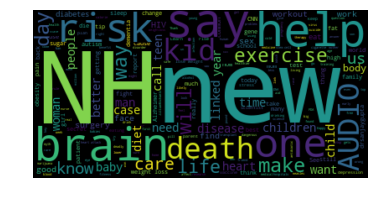

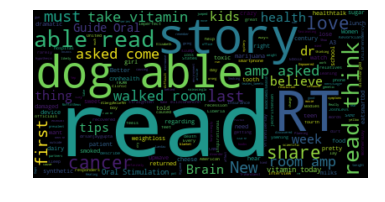

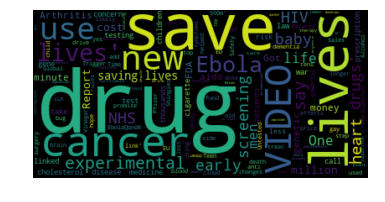

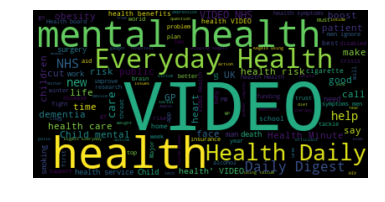

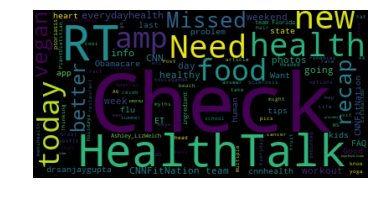

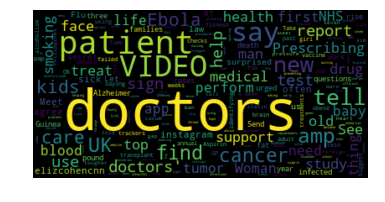

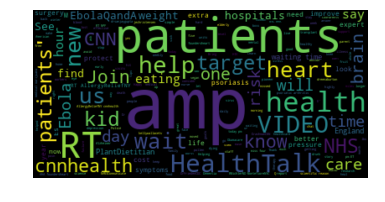

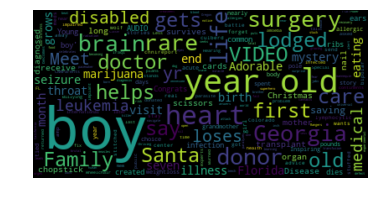

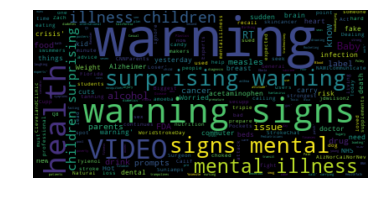

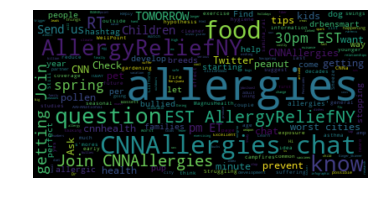

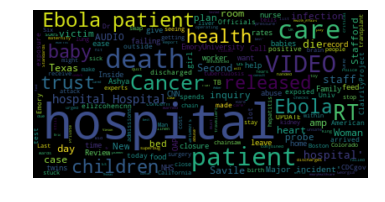

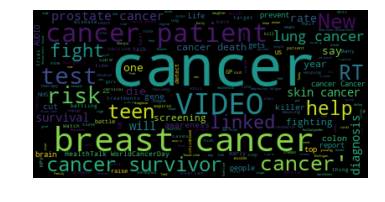

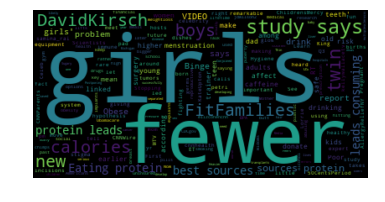

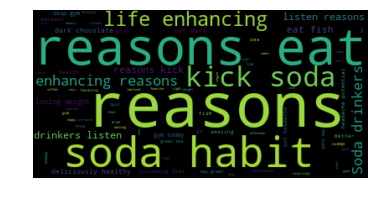

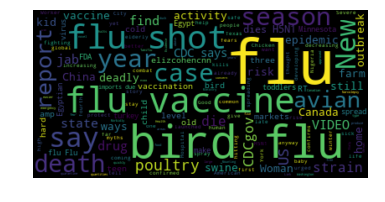

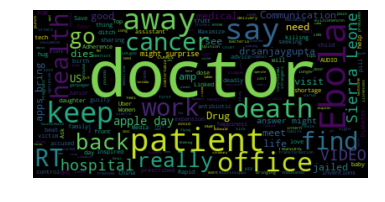

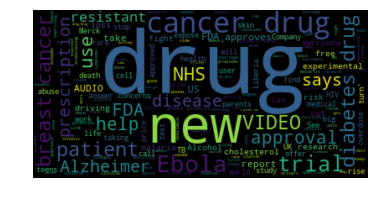

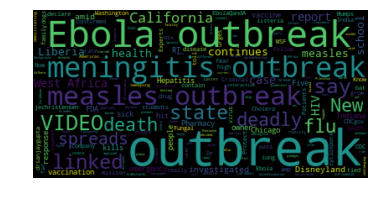

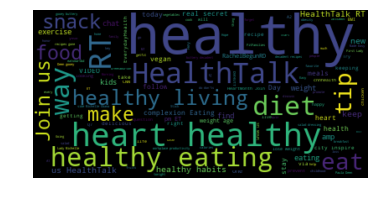

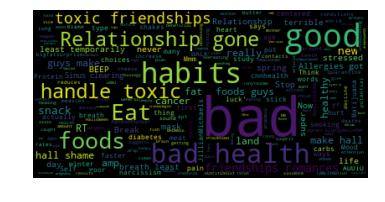

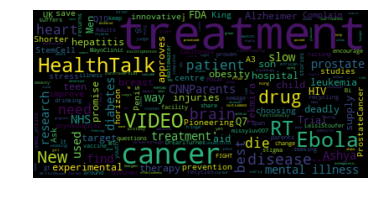

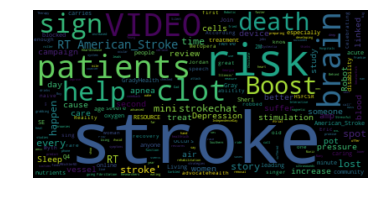

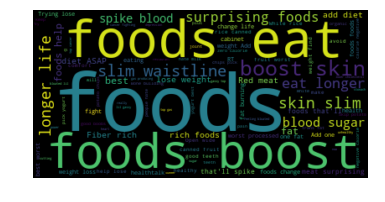

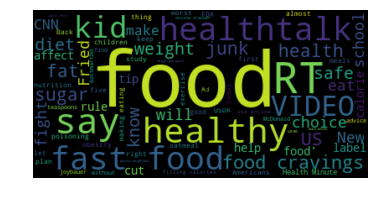

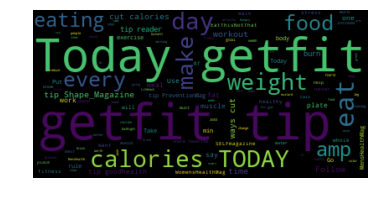

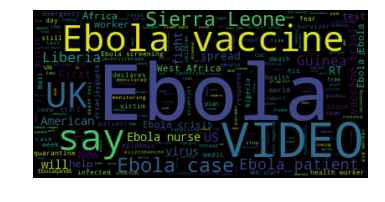

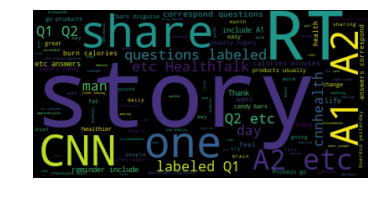

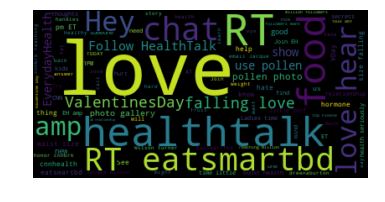

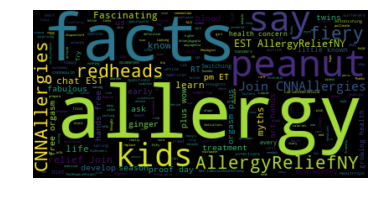

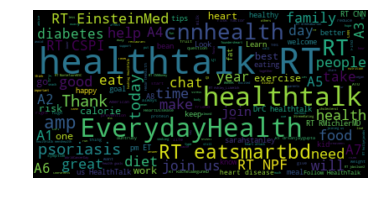

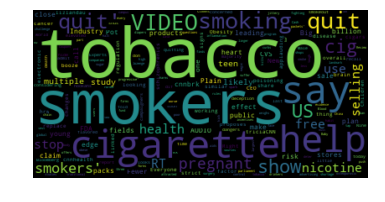

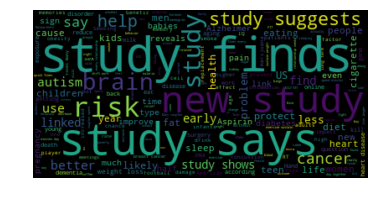

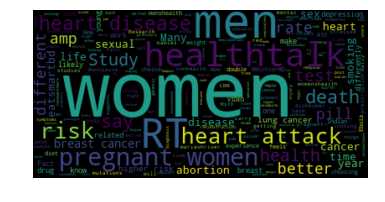

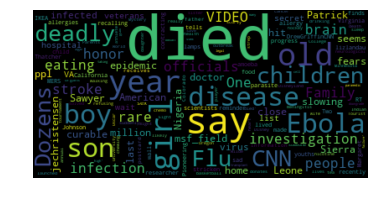

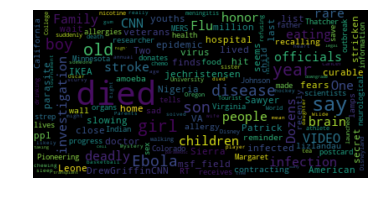

In [126]:
import os
from os import path
from wordcloud import WordCloud
import wordcloud
import matplotlib.pyplot as plt

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
stopwords = open("stopwords").read().splitlines()
for c in range (k):
    text = open(path.join(d, 'output/clusters/k_'+str(c)+'.txt')).read()
    print('output/clusters/k_'+str(c)+'.txt')

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, stopwords=stopwords).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("output/wordclouds/k_"+str(c)+".png")
    
    

In [1]:
closest_data = []
for i in range(k):
    d = kmeans_model.transform(df[labels==i])[:, i]
    
    ind = np.argsort(d)[::-1][:4]
    
    #print(ind, df[labels==i].shape)
    
    closest_data.append(ind)

for i in range(k):
    df_text_i = df_text[labels == i]
    file_k = open("output/medoids/k_"+str(i)+"_medoids.txt", 'w+')
    for n in range (len(closest_data[i])):
        file_k.write(np.take(df_text_i, closest_data[i][n])+"\n")
    file_k.close()

NameError: name 'k' is not defined

In [128]:
# # The dbscan algorithm is implemented in the scikits-learn library
# from sklearn.cluster import DBSCAN
  
# #A = pd.read_csv("A.csv")

# db = DBSCAN(eps=0.001, min_samples=5, n_jobs=-1).fit(train_df)
# labels = db.labels_

# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print(n_clusters_)

In [129]:
%load_ext wurlitzer

In [131]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

#t-SNE embedding of the digits dataset
# print("Computing t-SNE embedding")
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=50.0)
# t0 = time()
# X_tsne = tsne.fit_transform(train_df)

# plot_embedding(X_tsne,
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0))

# plt.show()

from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=8, perplexity=400, verbose=1)
Y = tsne.fit_transform(df)


Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 400.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 13229
Done in 179.00 seconds (sparsity = 0.139179)!
Learning embedding...
Iteration 51: error is 66.024138 (50 iterations in 10.00 seconds)
Iteration 101: error is 66.024138 (50 iterations in 9.00 seconds)
Iteration 151: error is 66.024138 (50 iterations in 10.00 seconds)
Iteration 201: error is 66.024138 (50 iterations in 10.00 seconds)
Iteration 251: error is 3.017105 (50 iterations in 11.00 seconds)
Iteration 301: error is 3.017105 (50 iterations in 11.00 seconds)
Iteration 351: error is 3.017105 (50 iterations in 10.00 seconds)
Iteration 401: error is 3.017105 (50 iterations in 9.00 seconds)
Iteration 451: error is 2.775821 (50 iterations in 10.00 seconds)
Iteration 501: error is 2.709945 (50 iterations in 9.00 seconds)
Iteration 551: error is 2.702275 (50 iterations in 10.00 seconds)
Iteration 601: error is 2.699122 (50

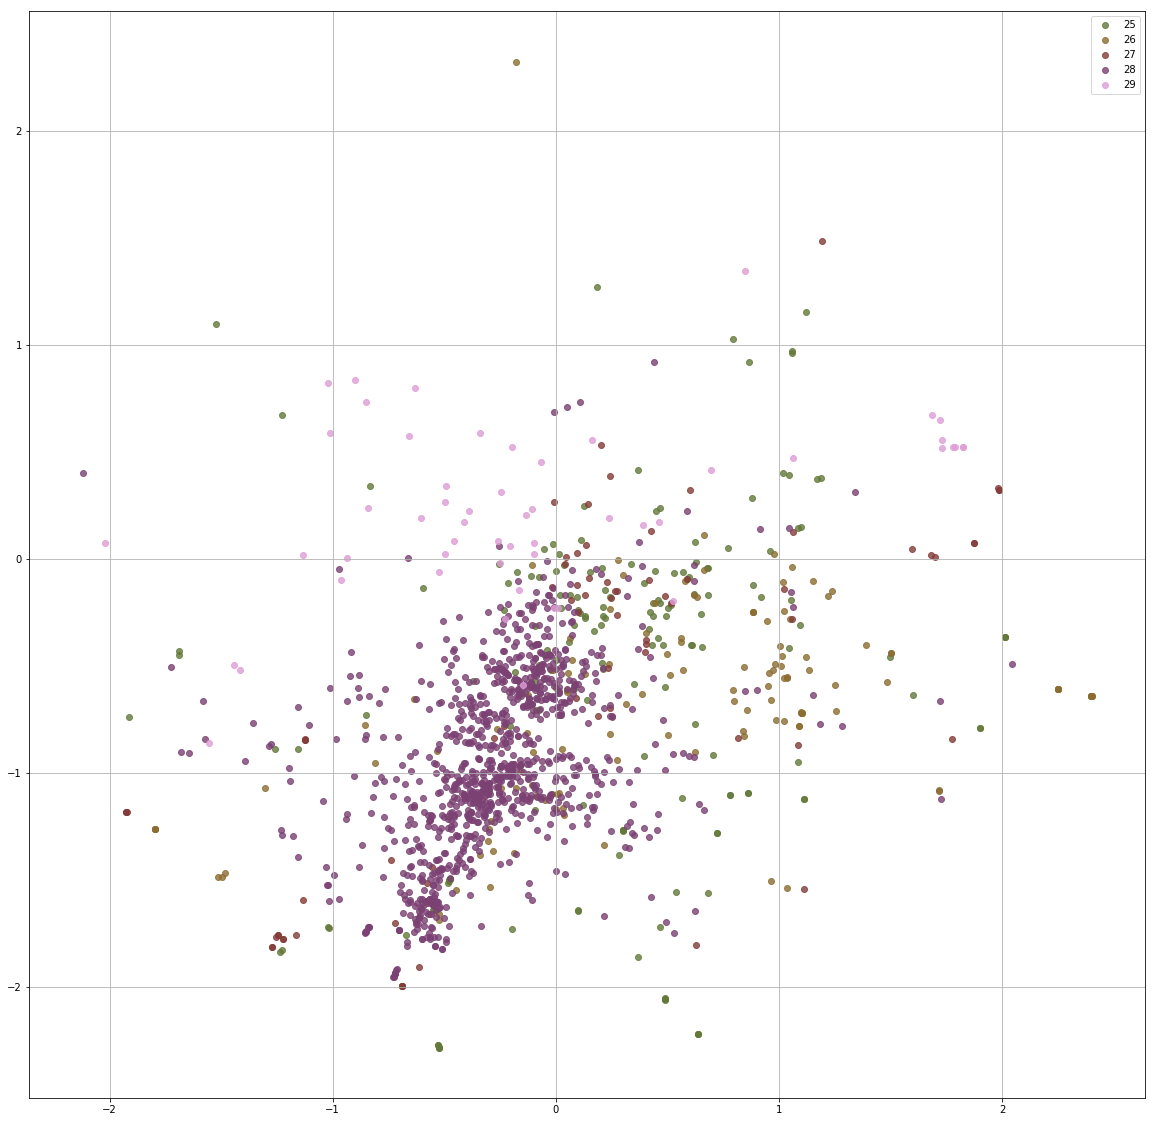

In [142]:
tsne_result_scaled = StandardScaler().fit_transform(Y)

starting_cluster = 25
last_cluster = 30
aux = np.array(labels<=last_cluster) * np.array(labels>starting_cluster)

visualize_scatter(tsne_result_scaled[aux], labels[aux], starting_cluster=starting_cluster)